# Importing Modules

In [ ]:
import os
import numpy as np
import scipy

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.applications import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.losses import *
import tensorflow.keras.backend as K
from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt

import cv2
from PIL import Image
print("All Modules Successfully Loaded")

All Modules Successfully Loaded


In [ ]:
from google.colab import files
files.upload()

Saving Rudra.jpeg to Rudra.jpeg
Saving Saswat#1.jpeg to Saswat#1.jpeg
Saving Saswat#2.jpeg to Saswat#2.jpeg


{'Rudra.jpeg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xe10\x92Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x06\x00\x0b\x00\x02\x00\x00\x00&\x00\x00\x08b\x01\x12\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x011\x00\x02\x00\x00\x00&\x00\x00\x08\x88\x012\x00\x02\x00\x00\x00\x14\x00\x00\x08\xae\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x08\xc2\xea\x1c\x00\x07\x00\x00\x08\x0c\x00\x00\x00V\x00\x00\x11F\x1c\xea\x00\x00\x00\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

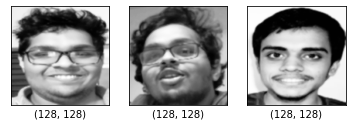

In [ ]:
data = []; test_data = []
plt.subplot(131)
img_1 = cv2.imread("./Saswat#1.jpeg")
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
img_1 = cv2.resize(img_1, (128, 128))
img_1 = cv2.GaussianBlur(img_1, (3, 3), 0)
plt.xlabel(f'{img_1.shape}')
plt.xticks([])
plt.yticks([])
plt.imshow(img_1, cmap = 'Greys_r');

plt.subplot(132)
img_2 = cv2.imread("./Saswat#2.jpeg")
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)
img_2 = cv2.resize(img_2, (128, 128))
img_2 = cv2.GaussianBlur(img_2, (3, 3), 0)
plt.xlabel(f'{img_2.shape}')
plt.xticks([])
plt.yticks([])
plt.imshow(img_2, cmap = 'Greys_r');

for i in range(200):
    if (i%2==0):
        data.append(np.expand_dims(img_1, axis = 2))
    else:
        data.append(np.expand_dims(img_2, axis = 2))


plt.subplot(133)
img = cv2.imread("./Rudra.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (128, 128))
img = cv2.GaussianBlur(img, (3, 3), 0)
test_data.append(np.expand_dims(img, axis = 2))
plt.xlabel(f'{img.shape}')
plt.xticks([])
plt.yticks([])
plt.imshow(img, cmap = 'Greys_r');

In [ ]:
data = np.array(data, dtype='float32')
data = data/255.
data.shape

(200, 128, 128, 1)

In [ ]:
test_data = np.array(test_data, dtype='float32')
test_data = test_data/255.
test_data.shape

(1, 128, 128, 1)

# Building Vauto_encoder

In [ ]:
class VariationalAutoencoder:
        
    def __init__(self,
                 input_dim,
                 encoder_conv_filters,
                 encoder_conv_kernel_size,
                 encoder_conv_strides,
                 decoder_conv_t_filters,
                 decoder_conv_t_kernel_size,
                 decoder_conv_t_strides,
                 z_dim,
                 use_batch_norm = False,
                 use_dropout= False
                ):
                       
        self.name = 'variational_autoencoder'

        self.input_dim = input_dim
        self.encoder_conv_filters = encoder_conv_filters
        self.encoder_conv_kernel_size = encoder_conv_kernel_size
        self.encoder_conv_strides = encoder_conv_strides
        self.decoder_conv_t_filters = decoder_conv_t_filters
        self.decoder_conv_t_kernel_size = decoder_conv_t_kernel_size
        self.decoder_conv_t_strides = decoder_conv_t_strides
        self.z_dim = z_dim

        self.use_batch_norm = use_batch_norm
        self.use_dropout = use_dropout

        self.n_layers_encoder = len(encoder_conv_filters)
        self.n_layers_decoder = len(decoder_conv_t_filters)


        # Encoder
        encoder_input = Input(shape=self.input_dim, name='encoder_input')

        x = encoder_input

        for i in range(self.n_layers_encoder):
           
            conv_layer = Conv2D(
                filters = self.encoder_conv_filters[i],
                kernel_size = self.encoder_conv_kernel_size[i],
                strides = self.encoder_conv_strides[i],
                padding = 'same',
                name = 'encoder_conv_' + str(i)
                )

            x = conv_layer(x)

            if self.use_batch_norm:
                x = BatchNormalization()(x)
           
            x = LeakyReLU()(x)

            if self.use_dropout:
                x = Dropout(rate = 0.25)(x)

           
        shape_before_flattening = K.int_shape(x)[1:]

        x = Flatten()(x)
        self.mu = Dense(self.z_dim, name='mu')(x)
        self.log_var = Dense(self.z_dim, name='log_var')(x)

        # self.encoder_mu_log_var = Model(encoder_input, (self.mu, self.log_var))

        def sampling(args):           
            mu, log_var = args
            epsilon = K.random_normal(shape=K.shape(mu), mean=0., stddev=1.)
            return mu + K.exp(log_var / 2) * epsilon

        encoder_output = Lambda(sampling, name='encoder_output')([self.mu, self.log_var])

        self.encoder = Model(encoder_input, [self.mu, self.log_var, encoder_output])
       
       

        # DECODER
        decoder_input = Input(shape=(self.z_dim,), name='decoder_input')

        x = Dense(np.prod(shape_before_flattening))(decoder_input)
        x = Reshape(shape_before_flattening)(x)

        for i in range(self.n_layers_decoder):           
            conv_t_layer = Conv2DTranspose(
                filters = self.decoder_conv_t_filters[i],
                kernel_size = self.decoder_conv_t_kernel_size[i],
                strides = self.decoder_conv_t_strides[i],
                padding = 'same',
                name = 'decoder_conv_t_' + str(i)
                )

            x = conv_t_layer(x)
           
            if i < self.n_layers_decoder - 1:
                if self.use_batch_norm:
                    x = BatchNormalization()(x)
                x = LeakyReLU()(x)
                if self.use_dropout:
                    x = Dropout(rate = 0.25)(x)
            else:
              x = Activation('sigmoid')(x)           
           

        decoder_output = x

        self.decoder = Model(decoder_input, decoder_output)

        # ### THE FULL VAE
        # model_input = encoder_input
        # model_output = self.decoder(encoder_output)

        # self.model = Model(model_input, model_output)


    def _build(self):
        return self.encoder, self.decoder

In [ ]:
IMG_SHAPE = (128, 128, 1)
vae = VariationalAutoencoder(
                        input_dim = IMG_SHAPE,
                        encoder_conv_filters=[32,64,64,64],
                        encoder_conv_kernel_size=[3,3,3,3],
                        encoder_conv_strides=[2,2,2,2],
                        decoder_conv_t_filters=[64,64,32,1],
                        decoder_conv_t_kernel_size=[3,3,3,3],
                        decoder_conv_t_strides=[2,2,2,2],
                        z_dim=128,
                        use_batch_norm = False,
                        use_dropout = False)

In [ ]:
encoder, decoder = vae._build()

In [ ]:
encoder.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
encoder_conv_0 (Conv2D)         (None, 64, 64, 32)   320         encoder_input[0][0]              
__________________________________________________________________________________________________
leaky_re_lu_14 (LeakyReLU)      (None, 64, 64, 32)   0           encoder_conv_0[0][0]             
__________________________________________________________________________________________________
encoder_conv_1 (Conv2D)         (None, 32, 32, 64)   18496       leaky_re_lu_14[0][0]             
____________________________________________________________________________________________

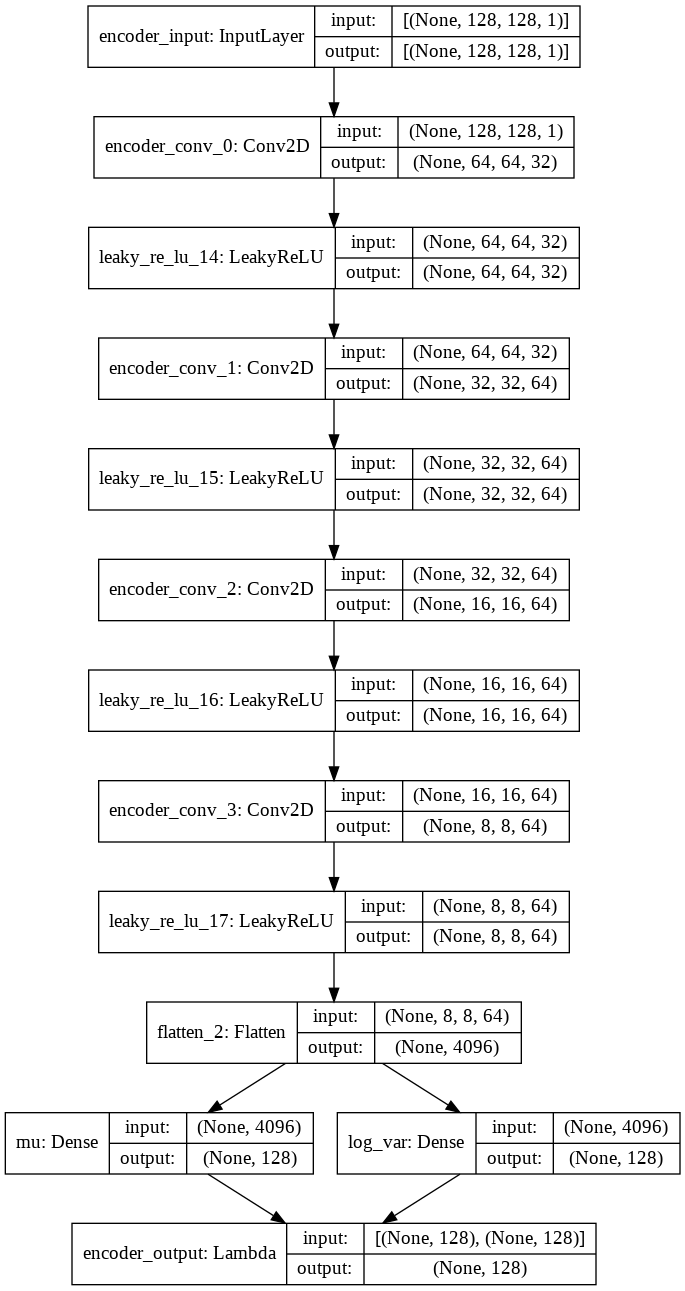

In [ ]:
plot_model(encoder, show_layer_names = True, show_shapes = True)

In [ ]:
decoder.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   [(None, 128)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 4096)              528384    
_________________________________________________________________
reshape_2 (Reshape)          (None, 8, 8, 64)          0         
_________________________________________________________________
decoder_conv_t_0 (Conv2DTran (None, 16, 16, 64)        36928     
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 16, 16, 64)        0         
_________________________________________________________________
decoder_conv_t_1 (Conv2DTran (None, 32, 32, 64)        36928     
_________________________________________________________________
leaky_re_lu_19 (LeakyReLU)   (None, 32, 32, 64)        0   

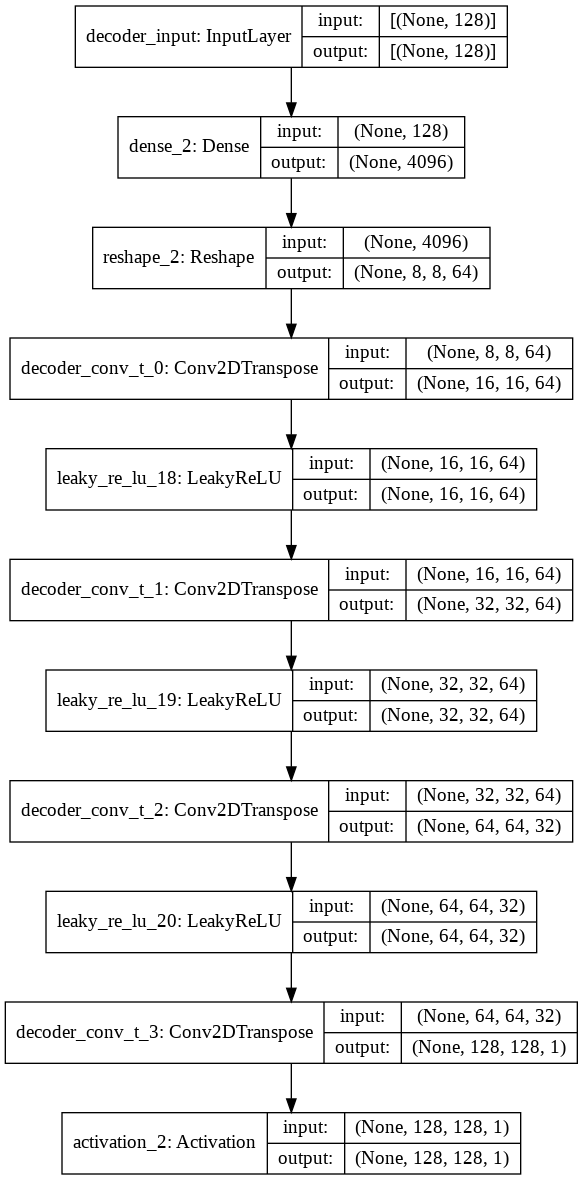

In [ ]:
plot_model(decoder, show_layer_names = True, show_shapes = True)

## Training

In [ ]:
class VAE(Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = tf.keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = tf.keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = tf.keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    tf.keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

In [ ]:
vae_model = VAE(encoder, decoder)

In [ ]:
BS = 1
EPOCHS = 500

# class myCallback(Callback):
#     def on_epoch_end(self, epoch, logs = {}):
#         # if (epoch%15 == 0):
#         base_imgs = np.array([data[0], data[1]])
#         z_mean, z_log_var, z = vae_model.encoder(base_imgs)
#         decoded_imgs = vae_model.decoder.predict(z_mean)
#         print(f"base_imgs : {base_imgs[0].shape}")
#         n = len(base_imgs)
#         plt.figure(figsize=(20, 10))
#         for i in range(1, n + 1):
#             # Display original
#             ax = plt.subplot(2, n, i)
#             plt.imshow(np.squeeze(base_imgs[i-1], axis = 2), cmap = 'Greys_r');
#             plt.gray()
#             ax.get_xaxis().set_visible(False)
#             ax.get_yaxis().set_visible(False)
#             plt.title("Original")    

#             # Display reconstruction
#             ax = plt.subplot(2, n, i + n)
#             plt.imshow(np.squeeze(decoded_imgs[i-1], axis = 2), cmap = 'Greys_r');
#             plt.gray()
#             ax.get_xaxis().set_visible(False)
#             ax.get_yaxis().set_visible(False)
#             plt.title("Reconstructed")

#         plt.show();


class myCallback(Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if not (os.path.exists("./Training_decodes")):
            os.mkdir("./Training_decodes")
            os.mkdir("./Training_decodes/Saswat#1")
            os.mkdir("./Training_decodes/Saswat#2")

        base_imgs = np.array([data[0], data[1]])
        z_mean, z_log_var, z = vae_model.encoder(base_imgs)
        decoded_imgs = vae_model.decoder.predict(z_mean)
        
        n = len(base_imgs)
        for i in range(n):                      
            img = np.squeeze(decoded_imgs[i-1], axis = 2)
            if(i%2 == 0):
                cv2.imwrite(f"./Training_decodes/Saswat#1/epoch_{epoch}.jpeg", img)
            else:
                cv2.imwrite(f"./Training_decodes/Saswat#2/epoch_{epoch}.jpeg", img)

# plot_prediction = myCallback()
save_prediction = myCallback()
LR = 1e-3
vae_model.compile(optimizer = 'adam')

early_stop = EarlyStopping(monitor = 'kl_loss', patience = 20,  mode = 'min', min_delta = 5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor = 'kl_loss', factor=0.2, patience = 3, min_lr = 2e-5, mode = 'min')



callbacks = [reduce_lr, save_prediction, early_stop]

In [ ]:
data.shape

(200, 128, 128, 1)

In [ ]:
training_history = vae_model.fit(data,                                    
                                epochs = EPOCHS,
                                verbose = 1,
                                batch_size = BS,
                                shuffle = True,
                                callbacks = callbacks
                                 )

Epoch 1/500
200/200 [==============================] - 2s 4ms/step - loss: 5498382653.5944 - reconstruction_loss: 663587.0000 - kl_loss: 1791424640.0000
Epoch 2/500
200/200 [==============================] - 1s 4ms/step - loss: 636934.6681 - reconstruction_loss: 13999.7061 - kl_loss: 500290.6875
Epoch 3/500
200/200 [==============================] - 1s 4ms/step - loss: 275105.6053 - reconstruction_loss: 11183.5684 - kl_loss: 217962.1406
Epoch 4/500
200/200 [==============================] - 1s 4ms/step - loss: 149290.5546 - reconstruction_loss: 10336.8047 - kl_loss: 128601.5000
Epoch 5/500
200/200 [==============================] - 1s 4ms/step - loss: 99312.1082 - reconstruction_loss: 9927.4180 - kl_loss: 86383.5391
Epoch 6/500
200/200 [==============================] - 1s 4ms/step - loss: 79055.2816 - reconstruction_loss: 9741.4258 - kl_loss: 62574.6094
Epoch 7/500
200/200 [==============================] - 1s 4ms/step - loss: 60403.4467 - reconstruction_loss: 9532.4043 - kl_loss: 475

In [ ]:
n_epochs = 85
kl_loss = training_history.history['kl_loss']
reconstruction_loss = training_history.history['reconstruction_loss']
total_loss = training_history.history['loss']
epochs = [d for d in range(1, n_epochs+1)]

In [ ]:
len(epochs)

85

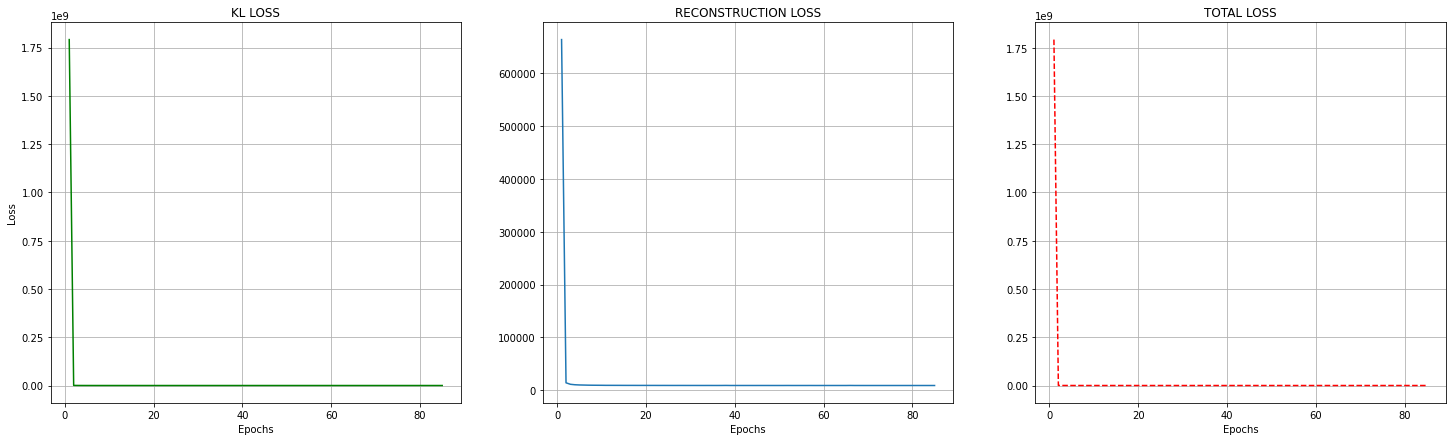

In [ ]:
plt.figure(figsize=(25, 7))

plt.subplot(1, 3, 1)
plt.plot(epochs, kl_loss, '-g')
plt.title("KL LOSS")
plt.grid(True)
plt.xlabel('Epochs'); plt.ylabel('Loss')

plt.subplot(1, 3, 2)
plt.plot(epochs, reconstruction_loss)
plt.title("RECONSTRUCTION LOSS")
plt.grid(True)
plt.xlabel('Epochs')

plt.subplot(1, 3, 3)
plt.plot(epochs, total_loss, '--r')
plt.title("TOTAL LOSS")
plt.grid(True)
plt.xlabel('Epochs')


plt.show()

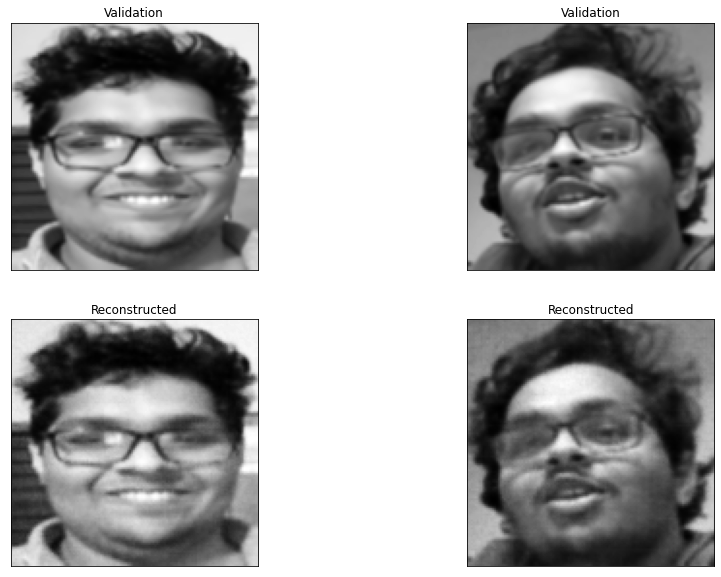

In [ ]:
z_val_mean, z_val_log_var, z_val = encoder(data)
decoded_val_imgs = decoder.predict(z_val)

n = 2
plt.figure(figsize=(15, 10))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(np.squeeze(data[i-1], axis = 2));
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title("Validation")    

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(np.squeeze(decoded_val_imgs[i-1], axis = 2));
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title("Reconstructed")

    # # Display masked original
    # ax = plt.subplot(4, n, i + 2*n)
    # plt.imshow(Aayush_masked[10+i]);
    # plt.gray()
    # ax.get_xaxis().set_visible(False)
    # ax.get_yaxis().set_visible(False)
    # plt.title("Validation") 

    # # Display masked reconstruction
    # ax = plt.subplot(4, n, i + 3*n)
    # plt.imshow(decoded_masked_imgs[10+i]);
    # plt.gray()
    # ax.get_xaxis().set_visible(False)
    # ax.get_yaxis().set_visible(False)
    # plt.title("ReconMasked")

plt.show();

In [ ]:
enc = load_model("/content/ModelCheckpoints/VAE_GANS_encoder.h5")
dec = load_model("/content/ModelCheckpoints/VAE_GANS_decoder.h5")

(1, 128, 128, 1)


Text(0.5, 1.0, 'Reconstructed')

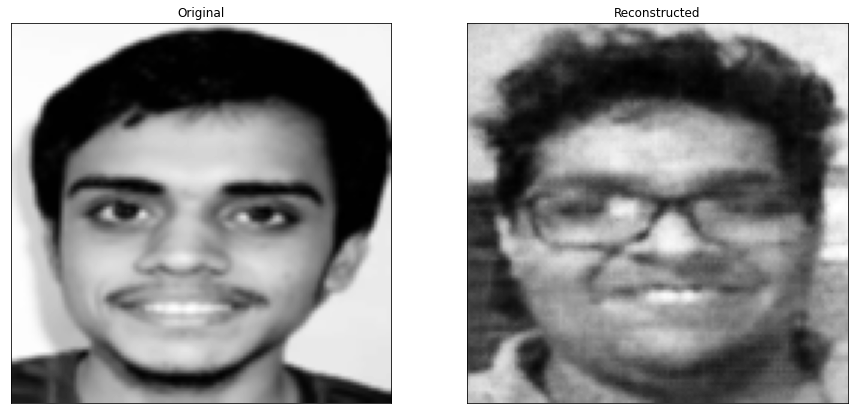

In [ ]:
z_val_mean, z_val_log_var, z_val = enc(test_data)
decoded_val_imgs = dec.predict(z_val)

plt.figure(figsize=(15, 10))

# Display original
ax = plt.subplot(1, 2, 1)
print(test_data.shape)
plt.imshow(np.squeeze(test_data[0]*255, axis = 2));
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.title("Original")    

# Display reconstruction
ax = plt.subplot(1, 2, 2)
plt.imshow(np.squeeze(decoded_val_imgs[0]*255, axis = 2));
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.title("Reconstructed")

In [ ]:
import glob
from PIL import Image

# filepaths
fp_in = "/content/Training_decodes/Saswat#1/*.jpeg"
fp_out = "./Saswat#1.gif"
# print([Image.open(f) for f in sorted(glob.glob(fp_in))])
img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=200, loop=0)

In [ ]:
decoder.save("/content/ModelCheckpoints/VAE_GANS_decoder.h5")
encoder.save("/content/ModelCheckpoints/VAE_GANS_encoder.h5") 

In [ ]:
!zip -r /content/VAE_GANS_WEIGHTS.zip /content/ModelCheckpoints

print("Zipping Done")

from google.colab import files
files.download("/content/VAE_GANS_WEIGHTS.zip")

print("Downloading the files")

  adding: content/ModelCheckpoints/ (stored 0%)
  adding: content/ModelCheckpoints/VAE_GANS_encoder.h5 (deflated 8%)
  adding: content/ModelCheckpoints/VAE_GANS_decoder.h5 (deflated 8%)
Zipping Done


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>